In [2]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import cProfile

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


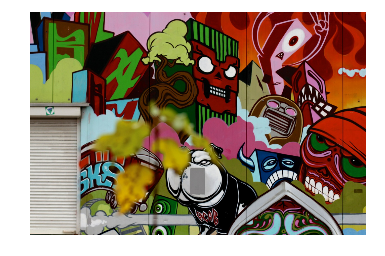

In [4]:
#Load the image
path_to_image = 'images/graffiti.jpg'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
%%timeit
#Time: creation of the detector
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

The slowest run took 6.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.58 µs per loop


In [6]:
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

In [7]:
%%timeit
#Time: detect all regions in color image
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)

1 loop, best of 3: 5.27 s per loop


In [8]:
cProfile.run('det.detect(img, find_holes=True, find_islands=True, find_indentations=True, \
                    find_protrusions=True, visualize=False)')

         3549 function calls in 8.613 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    8.613    8.613 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 _methods.py:25(_amax)
      480    0.001    0.000    0.011    0.000 _methods.py:31(_sum)
        1    0.022    0.022    1.877    1.877 binarization.py:140(binarize_withthreshold)
        1    0.000    0.000    1.877    1.877 binarization.py:215(binarize)
        1    0.000    0.000    0.000    0.000 binarydetector.py:109(reset)
        2    0.000    0.000    0.136    0.068 binarydetector.py:121(get_holes)
        2    0.000    0.000    0.260    0.130 binarydetector.py:133(get_islands)
        1    0.000    0.000    4.602    4.602 binarydetector.py:145(get_protrusions)
        1    0.001    0.001    1.735    1.735 binarydetector.py:154(get_indentations)
        2    0.000    0.000    0.382    0.191 binarydetector.py:163(_detect_h

In [24]:
%%timeit
#Only holes and islands
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=False,
                    find_protrusions=False,
                    visualize=False)

1 loop, best of 3: 1.34 s per loop


## Binarization

In [9]:
lam_factor = 3
area_factor_large = 0.001
area_factor_verylarge = 0.1
lam = 50
connectivity = 4
weights=(0.33,0.33,0.33)
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
%%timeit
#Creation of the binarizer
binarizer = sr.DatadrivenBinarizer(area_factor_large=area_factor_large, area_factor_verylarge=area_factor_verylarge, 
                                           lam=lam, weights=weights, connectivity=connectivity)

The slowest run took 18.78 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.53 µs per loop


In [11]:
binarizer = sr.DatadrivenBinarizer(area_factor_large=area_factor_large, area_factor_verylarge=area_factor_verylarge, 
                                           lam=lam, weights=weights, connectivity=connectivity)

In [12]:
%%timeit
#The binarization
binarized = binarizer.binarize(grayscale, visualize=False)

1 loop, best of 3: 2.38 s per loop


In [13]:
cProfile.run('binarizer.binarize(grayscale, visualize=False)')

         1782 function calls in 2.773 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.773    2.773 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 _methods.py:25(_amax)
      480    0.000    0.000    0.009    0.000 _methods.py:31(_sum)
        1    0.048    0.048    2.773    2.773 binarization.py:140(binarize_withthreshold)
        1    0.000    0.000    2.773    2.773 binarization.py:215(binarize)
        1    0.000    0.000    2.773    2.773 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        3    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
      160    2.606    0.016    2.606    0.016 {connectedComponentsWithStats}
        1    0.000    0.000    0.000    0.000 {method 'argmax' of 'numpy.ndarray' 

## Binary detection

In [14]:
binarized = binarizer.binarize(grayscale, visualize=False)
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
se = det.SE

In [15]:
area_factor=0.05

In [16]:
%%timeit
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
regions = detector.detect(binarized, visualize=False)

1 loop, best of 3: 4.6 s per loop


In [17]:
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
cProfile.run('detector.detect(binarized, visualize=False)')

         2410 function calls in 5.191 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.191    5.191 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 binarydetector.py:109(reset)
        2    0.000    0.000    0.336    0.168 binarydetector.py:121(get_holes)
        2    0.000    0.000    0.462    0.231 binarydetector.py:133(get_islands)
        1    0.000    0.000    2.683    2.683 binarydetector.py:145(get_protrusions)
        1    0.000    0.000    1.710    1.710 binarydetector.py:154(get_indentations)
        2    0.000    0.000    0.765    0.382 binarydetector.py:163(_detect_holelike)
        2    0.278    0.139    4.393    2.196 binarydetector.py:186(_detect_protrusionlike)
        6    0.739    0.123    0.799    0.133 binarydetector.py:242(_remove_small_elements)
      148    0.003    0.000    0.133    0.001 binarydetector.py:297(_fill_image)
        1    0.000    0.000

In [18]:
#Only holes and islands
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
cProfile.run('detector.detect(binarized, find_indentations=False, \
                    find_protrusions=False, visualize=False)')

         1366 function calls in 0.792 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.792    0.792 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 binarydetector.py:109(reset)
        1    0.000    0.000    0.343    0.343 binarydetector.py:121(get_holes)
        1    0.000    0.000    0.449    0.449 binarydetector.py:133(get_islands)
        2    0.000    0.000    0.745    0.373 binarydetector.py:163(_detect_holelike)
        2    0.727    0.363    0.745    0.372 binarydetector.py:242(_remove_small_elements)
        2    0.001    0.000    0.046    0.023 binarydetector.py:297(_fill_image)
        1    0.000    0.000    0.792    0.792 binarydetector.py:57(detect)
        2    0.000    0.000    0.000    0.000 {bitwise_and}
        3    0.000    0.000    0.000    0.000 {bitwise_not}
        2    0.000    0.000    0.000    0.000 {bitwise_or}
        1    0.000    0.000    0.792

## MSER detection

In [20]:
mser = cv2.MSER_create()

In [25]:
%%timeit
regions = mser.detectRegions(img, None)

1 loop, best of 3: 449 ms per loop


In [22]:
cProfile.run('mser.detectRegions(img, None)')

         4 function calls in 1.025 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.025    1.025 <string>:1(<module>)
        1    0.000    0.000    1.025    1.025 {built-in method builtins.exec}
        1    1.025    1.025    1.025    1.025 {method 'detectRegions' of 'cv2.MSER' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Conclusion
The tophat operation (for protrusions and indentations) is the bottleneck, takes 4.9 (of in total 5.7) seconds.
The binarization is also quite slow because the function `connectedComponentsWithStats` is called for every threshold level.

The MSER detection is somewhat faster for a color image (about 2-3 times as fast).

In [28]:
%timeit cv2.morphologyEx(binarized, cv2.MORPH_TOPHAT, se)

1 loop, best of 3: 1.2 s per loop


In [29]:
%timeit cv2.morphologyEx(binarized, cv2.MORPH_OPEN, se)

1 loop, best of 3: 1.22 s per loop


In [31]:
%timeit cv2.erode(binarized, se)
%timeit cv2.dilate(binarized, se)

1 loop, best of 3: 627 ms per loop
1 loop, best of 3: 602 ms per loop
